<a href="https://colab.research.google.com/github/riyapatelrp/Airbnb-Booking-Analysis-EDA-/blob/main/Capstone_AirBnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   **AirBnB Booking Analysis**

##### **Project Type** - EDA
##### **Contribution** - Team
##### **Team Member 1 -** Vinayak Vijay Marathe
##### **Team Member 2 -** Riya Patel
##### **Team Member 3 -** Muskan Kasere

# **Project Summary -**

AirBnb is a brief identify for **"Air Bed and Breakfast"**, is a online hospitality company focused on short time length homestays or rental platform.

On airbnb, users can book a nearby to stay as accordance to their convinent in more than 34000+ cities at some aspect of 200+ countries. Airbnb used to started in 2008 by Brian Chesky and Joe Gebbia, specifically based in San Francisco California. Airbnb platform is reachable via mobile app and website.

In our project, there is 16 columns which has hosts, host_name, neighbourhood_group, neighbourhood, room_type etc and 48895 rows which has all the information about airbnb's hosts. This datasets also have some null values which are handled by us. We can also see the overall details of NYC using the map.


# **GitHub Link -**

Provide your GitHub Link here.

1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp
3.   Muskan Kasere: https://github.com/MuskanKasere/Airbnb_Booking_Analysis
   





# **Problem Statement**


The objective of the project is to perform an exploratory data analysis, data pre-processing, data cleaning & imputation and at the end, apply different Data Visualization techniques to get the meaningful insight from the given data. This project aims apply some amazing Python Libraries such as Folium and WordCloud which will give a boost to our visual understanding of the data.

These thousands and lots of records generate a lot of statistics/data and this data can be analyzed, used for security, grasp of customers/providers behavior, buisness preferences & performance on the platform, implementation of modern additional service and for a lots of things. we are analyzing the various aspects with different use cases which covers many aspects of airbnb listings.



#### **Define Your Business Objective?**

To Analyze the Buisness Trends and Customer's Views/Satisfaction

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for new york city map
import folium
from folium.plugins import FastMarkerCluster

### Dataset Loading

In [2]:
# Load Dataset
url = 'https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
airbnb_data = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
airbnb_data.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Info
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Visualizing datasets on a map for easy understanding of individual location of NYC
# Here we pass coordinates of location (latitudes = 40.72 and longitude = -73.95)
locations = list(zip(airbnb_data.latitude, airbnb_data.longitude))

map1 = folium.Map(width=800,height=400,location=[40.72,-73.95], zoom_start=5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(airbnb_data[airbnb_data.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

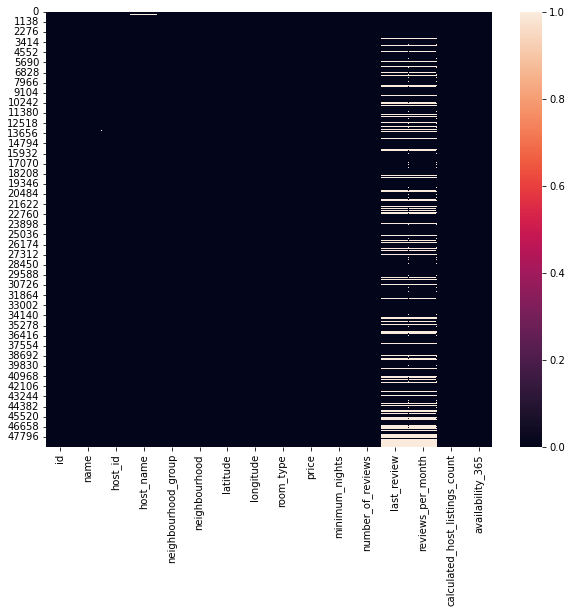

In [9]:
# Visualizing the missing values
plt.figure(figsize = (10,8))
sns.heatmap(airbnb_data.isnull())
plt.show()

In [10]:
# Droping the data that are not of interest
airbnb_data.drop(['id','last_review'], axis=1, inplace=True)
airbnb_data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


In [11]:
# Replacing all NaN values 
airbnb_data.fillna({'reviews_per_month':0}, inplace=True)
airbnb_data.fillna({'name':'unknown'}, inplace = True)
airbnb_data.fillna({'host_name':'unknown'}, inplace = True)

In [12]:
airbnb_data.head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [13]:
# Now our data is cleaned
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48895 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48895 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

### What did you know about your dataset?


These datasets of airbnb has a 48895 unique listing in New York city in total. The New York city Airbnb dataset contains a very well curated list of room postings from the New York city. Although it would be nice to have few more features about the rooms, users, comments, etc. I think a great number of task can be acomplished even with the limited number of entries in the dataset, at least, we all can learn something new about the vacation room rental in New York city.

## ***2. Understanding Your Variables***



In [14]:
# Dataset Columns
airbnb_data.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [15]:
# Dataset Describe of important column only
airbnb_data[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* From this we can see the mean price is around 152 dollars.
* Average availablity of an airbnb host around a year is 112 days.

### Variables Description 

*  id - unique listing id
*  Name - Represents Accommodations
*  Host id - Unique id for hosts
*  Host Name - Registerd name for hosts
*  Neighbourhood Group - Group of area/Locations
*  Neighbourhood - Area under neighbourhood group
*  Latitude - location of listing
*  Longitude - location of listing
*  Room Type - unique types of each room 
*  Price - price of properties in dollar
*  Minimum Nights - minimum nights stay required for single visit
*  Number Of Reviews - total rating 
*  Last review - latest review given
*  Reviews Per Months - ratings recieved per month
*  Calculated Host Listings Count - total number of properties registerd under hosts
*  Avaliability_365 - number of days for which host is available in a year for bookings


Numeric Variable

    host_id
    latitude                       
    longitude  
    price 
    minimum_nights    
    number_of_reviews                
    reviews_per_month               
    calculated_host_listings_count  
    availability_365 




Catagorical Variable

    name
    host_name                       
    neighbourhood_group              
    neighbourhood
    room_type    

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for unique_value in airbnb_data.columns:
  print("Unique values in",unique_value,"column is",airbnb_data[unique_value].nunique(),".")

Unique values in name column is 47906 .
Unique values in host_id column is 37457 .
Unique values in host_name column is 11453 .
Unique values in neighbourhood_group column is 5 .
Unique values in neighbourhood column is 221 .
Unique values in latitude column is 19048 .
Unique values in longitude column is 14718 .
Unique values in room_type column is 3 .
Unique values in price column is 674 .
Unique values in minimum_nights column is 109 .
Unique values in number_of_reviews column is 394 .
Unique values in reviews_per_month column is 938 .
Unique values in calculated_host_listings_count column is 47 .
Unique values in availability_365 column is 366 .


In [17]:
print('Unique values in neighbourhood_group is:',airbnb_data['neighbourhood_group'].unique())
print('Unique values in room_type is:',airbnb_data['room_type'].unique())

Unique values in neighbourhood_group is: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in room_type is: ['Private room' 'Entire home/apt' 'Shared room']


## 3. ***Data Wrangling***

### Data Wrangling Code

###<B>1. Which room type and locality are mostly in demand in NYC ?

In [18]:
# Write your code to make your dataset analysis ready.
# Most demanded room type
airbnb_data['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [19]:
# room type feature's mean price
airbnb_data.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Mostly demanded room type is either an entire home with the average price of more than 200 dollar or a private room with the average price of more than 85 dollar. While shared room is cheapest and more avaliable with the average price of 70$ approx. So it is clear that most of the guests prefers Entire home or apartment to stay.

In [20]:
# Most demanded locality
airbnb_data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Manhattan neighbourhood group is most demanded locality followed by Brooklyn & Queens. While Bronx & Staten Island is least demanded localities.

###**2. Top 10 Host with most properties/listing on airbnb website.**

In [21]:
# Top Most Host With maximum Properties
top10_host_details = airbnb_data['host_id'].value_counts().head(15)
top10_host_details

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

In [22]:
# creating dataframe for top most host with max properties
top10_host_df = pd.DataFrame(top10_host_details)
top10_host_df.reset_index(inplace=True)
top10_host_df.rename(columns={'index' : 'Host_id', 'host_id':'no_of_properties'}, inplace=True)
top10_host_df.head(10)

,Host_id,no_of_properties
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


In [23]:
#details of toppest host 
airbnb_data[airbnb_data['host_id'] == 219517861].head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.0,327,309


In [24]:
#details of second toppest host
airbnb_data[airbnb_data['host_id'] == 107434423].head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
26137,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.7451,-73.97915,Entire home/apt,308,30,0,0.0,232,156


So, Sonder(NYC) has the maximum number of listing on airbnb platform and also leads the most expensive neighbourhood group in New York city followed by Blueground with 232 properties on airbnb.

### **3. Top 10 Host with maximum number of reviews on the basis of reviews per months.**

In [25]:
# Top Host With Maximum Reviews
top10_host_with_review = airbnb_data.loc[airbnb_data['number_of_reviews'].value_counts(),'host_id']
top10_host_with_review

10052    40532977
5244      3028267
3465         5089
2520      4069241
1994      4628887
           ...   
1            2845
1            2845
1            2845
1            2845
1            2845
Name: host_id, Length: 394, dtype: int64

In [26]:
# Creating DataFrame of Top Host With Max Reviews
top10_host_with_review_df = pd.DataFrame(top10_host_with_review)
top10_host_with_review_df.reset_index(inplace=True)
top10_host_with_review_df.rename(columns={'index' :'no_of_reviews', 'host_id' : 'Host_id'}, inplace=True)
top10_host_with_review_df.head(10)

,no_of_reviews,Host_id
0,10052,40532977
1,5244,3028267
2,3465,5089
3,2520,4069241
4,1994,4628887
5,1618,3842134
6,1357,898980
7,1179,2483293
8,1127,2368133
9,964,1928213


In [27]:
# Top Most Host details 
airbnb_data[airbnb_data['host_id'] == 40532977]

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10052,Cozy Brooklyn Private Home,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.67982,-73.91347,Entire home/apt,35,3,63,1.33,4,0
19181,Cozy Brooklyn Room,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68137,-73.91359,Private room,38,30,5,0.15,4,0
20247,Private Room in Beautiful Brooklyn Private House.,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68128,-73.91196,Private room,29,60,13,0.42,4,51
22680,Cozy Large Private Master bedroom,40532977,Johari,Brooklyn,Bedford-Stuyvesant,40.68017,-73.91379,Private room,36,30,15,0.61,4,0


In [28]:
# Top second Host details 
airbnb_data[airbnb_data['host_id'] == 3028267].head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5244,1BR Clinton Hill Apt Beautiful Garden - Video,3028267,Vernon,Brooklyn,Clinton Hill,40.69352,-73.96556,Entire home/apt,150,7,15,0.27,1,280


So from this, Johari leads the most no. of review in neighbourhood group and room type in New York city followed by Vernon.

###<B>4. Top 10 most reviewed properties/listings on airbnb. 

In [29]:
# Top most reviewed listings 
top10_reviewed_listings= airbnb_data.nlargest(10,'reviews_per_month')[['name','reviews_per_month','neighbourhood_group','price']]
top10_reviewed_listings

,name,reviews_per_month,neighbourhood_group,price
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan,100
42076,Great Room in the heart of Times Square!,27.95,Manhattan,199
38870,Lou's Palace-So much for so little,20.94,Queens,45
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens,80
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens,50
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens,50
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens,48
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens,48
36238,“For Heaven Cakes”,15.78,Queens,75
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens,67


Property with highest number of reviews is Enjoy great views of the City in our Deluxe Room! with 58 reviews/month followed by Great Room in the heart of Times Square! with 27 reviews/month that is both is from Manhattan Neighbourhood Group. So that it is clear, Manhattan is the best suited place for a comfortable stay but the prices are also high to afford.

###<B>5. Top 3 Mostly Expensive Property/listings on airbnb.

In [30]:
# Expensive listings in each neighbourhood groups
most_expensive_listing = airbnb_data.loc[airbnb_data.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood','neighbourhood_group','host_name','price']].sort_values(by='price',ascending=False)[:5]
most_expensive_listing

,name,neighbourhood,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Greenpoint,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Upper West Side,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Astoria,Queens,Kathrine,10000
22353,Victorian Film location,Randall Manor,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Riverdale,Bronx,Kathy,2500


In [31]:
# Details of Most Expensive Listings in each neighbourhood group
airbnb_data[airbnb_data['price'] == airbnb_data['price'].max()].head(3)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


Most costly listings is from Luxury 1 bedroom apt. -stunning Manhattan views, 1-BR Lincoln Center and Furnished room in Astoria apartment which is from Manhattan, Brooklyn and Queens hosted by Erin, Jelena and Kathrine respectively.

###<B>6. Which Property type and room type is cheapest and more available on airbnb ?

In [32]:
# Most cheapest listings in each neighbourhood groups
most_cheapest_neighgroup = airbnb_data.loc[airbnb_data.groupby(['neighbourhood_group'])['price'].idxmin()][['name','neighbourhood_group','host_name','room_type','price']].sort_values(by='price',ascending=False)
most_cheapest_neighgroup

,name,neighbourhood_group,host_name,room_type,price
45646,Happy Home 3,Staten Island,Raquel,Shared room,13
22835,IT'S SIMPLY CONVENIENT!,Queens,Maria,Entire home/apt,10
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,Anisha,Private room,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Brooklyn,Kimberly,Private room,0
26259,the best you can find,Manhattan,Qiuchi,Entire home/apt,0


Most cheapest listing is from IT'S SIMPLY CONVENIENT! and Happy Home 3 which is from Queens and Staten Island hosted by Maria and Raquel respectively. As it is cheap property so it will be more available for the customers.

Some of the properties having a price of zero which is either a free stay for specific time or the willingness of not to share the price with the Airbnb.

In [33]:
# Total neighbourhood group with different room types
airbnb_data.groupby('neighbourhood_group')['room_type'].value_counts().unstack(0)

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,379,9559,13199,2096,176
Private room,652,10132,7982,3372,188
Shared room,60,413,480,198,9


In [34]:
# Shared Room Percentage
share_room_percent = round((len(airbnb_data[airbnb_data['room_type']=='Shared room'])/len(airbnb_data['room_type']))*100, 2)
print(f'only {share_room_percent} % preffers Shared Room ')

only 2.37 % preffers Shared Room 


###<B>7. What is the average price/day of Airbnb listings with respect to neighbourhoods in NYC ? (Top neighbourhoods in NYC)

In [35]:
# Avg price wrt neighbourhood neighbour
# expensive neighbourhood 
df_ngroup= airbnb_data.groupby(['neighbourhood'])['price'].mean().reset_index()
#df_ngroup.head()
df_ngroup_sorted = df_ngroup.sort_values(by='price', ascending=False)
df_ngroup_sorted

,neighbourhood,price
82,Fort Wadsworth,800.000000
219,Woodrow,700.000000
197,Tribeca,490.638418
174,Sea Gate,487.857143
167,Riverdale,442.090909
...,...,...
141,New Dorp,57.000000
179,Soundview,53.466667
196,Tremont,51.545455
102,Hunts Point,50.500000


Among the top neighbourhoods in each neighbourhood groups, top 3 of them are Fort Wadsworth which is most expensive neighbourhood with average price of 800 dollar followed by Woodrow and Tribeca with the average price of dollar 700 and 490 respectively.

###<B>8. Properties with less number of reviews.

In [36]:
# Listings with Less Reviews
pro_reviews = airbnb_data[(airbnb_data['number_of_reviews']<3)]
pro_reviews.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.0,1,365
19,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0.0,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0.0,1,0
36,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.0,1,365
38,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0.0,1,365


As we can see, there are more than 32000 properties which have rating less than 3

###<B>9. Any Particular Neighbourhood/Location with Maximum no. of Bookings and revenue from room type ?

In [37]:
# Max no. of bookings in each neighbourhood
max_bookings = airbnb_data['neighbourhood'].value_counts()
max_bookings

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [38]:
#max booking wrt roomtype and its revenue
df = airbnb_data.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
df.sort_values("price",ascending=False).head()

,,price
neighbourhood,room_type,
Williamsburg,Entire home/apt,389724
Midtown,Entire home/apt,331395
Upper West Side,Entire home/apt,329129
Hell's Kitchen,Entire home/apt,301786
Upper East Side,Entire home/apt,284150


Williamsburg Location has more demand and maximum no. of bookings which has a expensive room type with the maximum price followed by Midtown, Upper West Side respectively.

### What all manipulations have you done and insights you found?

In the data wrangling process, we have analyzed different use cases based on locality, reviews, room type etc, from which we can clearly infere that Manhatten Neighbourhood group has the most expensive and luxurious entire home/apartments with maximum number of rewiews. Rather than it, most of the number of bookings were takes place in Williamsburg Location. We have also analyzed top 10 earner in terms of hosts and average price per day of the listing with respect to neighboorhood.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart (Univariate)

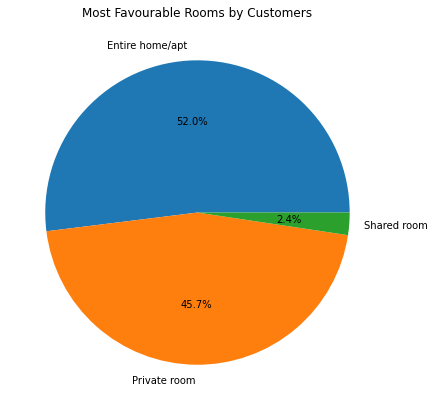

In [39]:
# Chart - 1 visualization code
# Graph - 1
# Demanded room type that customers choose the most
plt.figure(figsize = (7,7))
x_label = airbnb_data['room_type'].value_counts().index
y_label = airbnb_data['room_type'].value_counts().values
plt.pie(x = y_label, labels = x_label, autopct='%1.1f%%')
plt.title('Most Favourable Rooms by Customers')
plt.show()

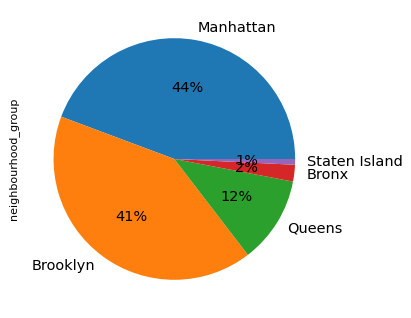

In [40]:
# Graph - 2
# Demanded location that customers choose the most
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', fontsize=13)
plt.show()

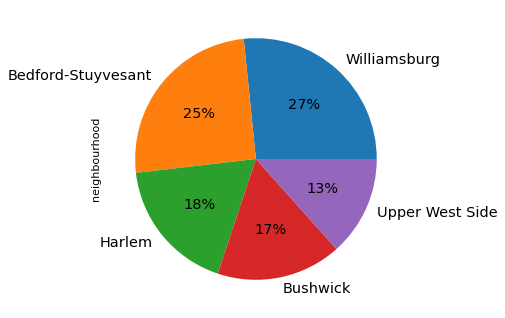

In [41]:
# Graph - 3
# Demanded neighbourhood that customers wants the most
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb_data['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',autopct='%1.0f%%',fontsize=13)
plt.show()

##### 1. Why did you pick the specific chart?

The main purpose of using pie chart is to indicates a part-to-whole relationship in our data. The portions of the graph are proportional to the fraction of the total in each and every category. The complete "pie" represents a hundred proportion of a whole, while at the same time, the pie "slices" signify portions of the whole. It shows the total coverages covered by room types, neighbourhood group & neighbourhood.

##### 2. What is/are the insight(s) found from the chart?

**Graph - 1:** It shows that more than 50% customers prefers entire home or apartment to stay. And after that 45.7% customers prefers private rooms to stay.Shared room is mostly available as it has very low customers.

**Graph - 2:** It tells us that 44% of the customers prefers Manhattan neighbourhood group followed by Brooklyn which is 41%. While Staten Island is least prefered location with 1%

**Graph - 3:** This graph shows that 27% of the total area is covered by Williamsburg Location, having more demand and maximum no. of bookings followed by Bedford-Stuyvesant covering the area of 25% respectively.
Harlem, Bushwick and Upper West Side approximately has same coverage of area that is 18%, 17% and 13% respectively

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. From this visual representation it is totally clear about all the room types, neighbourhood group and locations.

#### Chart - 2 - Dist Plot and Point Plot on Dependent Variable (Univariate)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


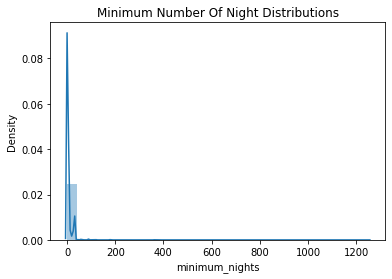

In [42]:
# Chart - 2 visualization code
# Graph 1
# Nights Booked
sns.distplot(airbnb_data['minimum_nights'], bins=31)
plt.title('Minimum Number Of Night Distributions')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


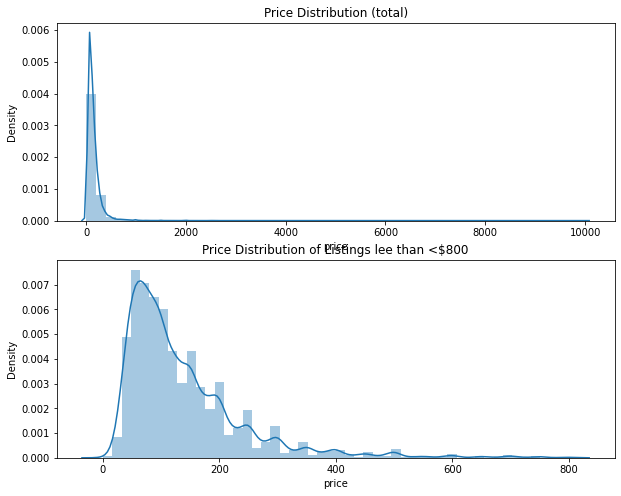

In [43]:
# Graph 2
# Distributions of the prices
fig, ax= plt.subplots(2,1, figsize=(10,8))

ax[0].set_title("Price Distribution (total)")
sns.distplot(airbnb_data['price'], kde=True, ax=ax[0])

ax[1].set_title("Price Distribution of Listings lee than <$800")
sns.distplot(airbnb_data[airbnb_data['price'] < 800]['price'], kde=True, ax=ax[1])

fig.show()
plt.show()

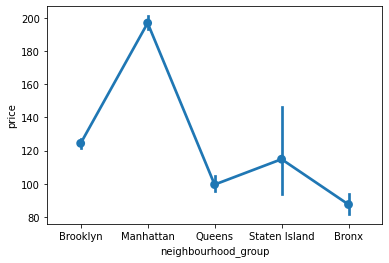

In [44]:
# Graph 3
# average price each neighbourhood groups holds
sns.pointplot(x = 'neighbourhood_group', y='price', data=airbnb_data, estimator=np.mean)
plt.show()

##### 1. Why did you pick the specific chart?

**Dist plot** is known as distribution plot which depicts the variations in data that is it will show the variations in distribution of observations. It also displays a combination of statistical representations of numerical data, such as histogram, kde, bars etc.


**Point plot** is generally utilized for representing an estimate of central tendency for a numerical variable via the role of scatter plot points. This plot constantly treats one of the variables as categorical and draws data for an ordinal position on a applicable axis even, if the record is of the numerical type. 

There is a line which connects each point, shows the interaction between two categorical variables which is easier for us than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

**Graph - 1:** Here we can see that high number of rooms is there with zero minimum nights and some of them is excessively higher. Also we can say that normal minimum nights is around 2 while at the same time the highest minimum nights tends to be around 30 nights.

Statistical Observation :-
* Average booking is around 7 nights.
* minimum booking is for 1 night.
* max booking is for more than a year or we can say for few years.

**Graph - 2:** Mostly distribution of the price are under the 1000.

**Graph - 3:** We can see that Manhattan has the highest(the costliest) average of price ranging to 150dollars/day followed by Brooklyn. Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in New York city.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will gained insights help creating a positive business impact

#### Chart - 3 - Word Cloud on Neighbourhood(Location) - (Univariate)

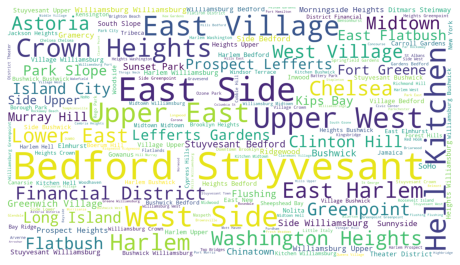

In [45]:
# Chart - 3 visualization code
# wordcloud for visualising unstructured text 
from wordcloud import WordCloud

plt.subplots(figsize=(8,8),facecolor = None)
wordcloud = WordCloud(width = 1600, height = 900, background_color ='white', 
                      min_font_size = 10).generate(" ".join(airbnb_data.neighbourhood))

# plot the WordCloud image					
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

We have used wordcloud which is a visual representation of the unstructured text as a images in which bigger is the word, more often that word is mentioned which is helpful in getting insights of trending patterns.

##### 2. What is/are the insight(s) found from the chart?

From the above visualization, we can definately come up with some conclusion that most of the time customers are going to prefer this keywords. So that we can easily examine that what exactly the behaviour and views of our customers.

These also tells us that which of the neighbourhood are mostly demanded by customer i.e. this areas comes under the top travel destinations.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Bar Plot on Bivariate variable (Bivariate)

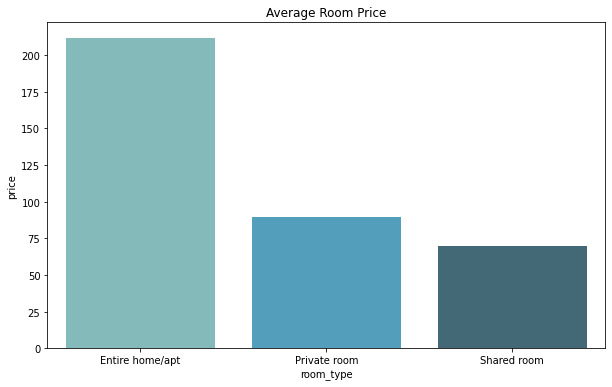

In [58]:
# Chart - 4 visualization code

# Graph 1
# Relation b/w room type and price

# mean price for room type
df= airbnb_data.groupby('room_type', as_index=False)[['price']].mean()
x_label = df['room_type']
y_label = df['price']
plt.figure(figsize=(10,6))
sns.barplot(data=df, x=x_label, y=y_label, palette='GnBu_d')
plt.title('Average Room Price')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


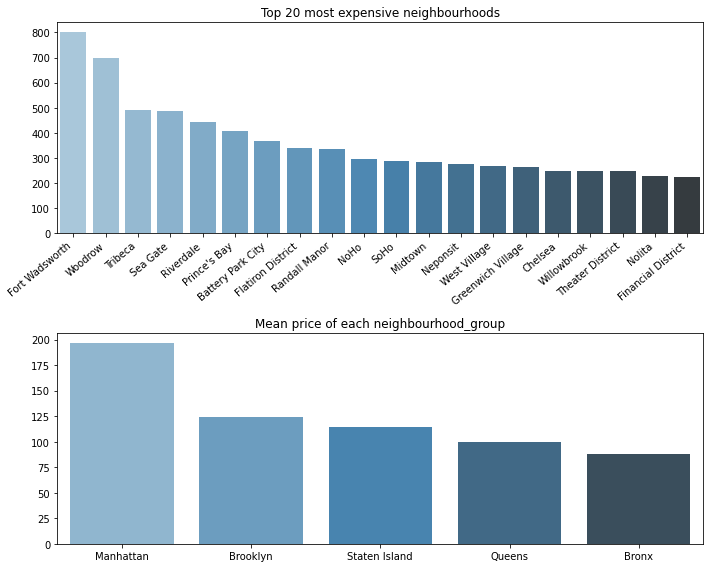

In [62]:
# Graph 2
# Relation b/w neighbouthood group, neighbourhood and price

fig, ax= plt.subplots(2,1, figsize=(10,8))

# To show the Top 20 most expensive neighbourhoods
d = airbnb_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
sns.barplot(d.index.tolist()[:20], d.values[:20], ax=ax[0], palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods')

# To show the Mean price of each neighbourhood_group
d = airbnb_data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("Blues_d"))
ax[1].set_title('Mean price of each neighbourhood_group')

fig.tight_layout()
fig.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


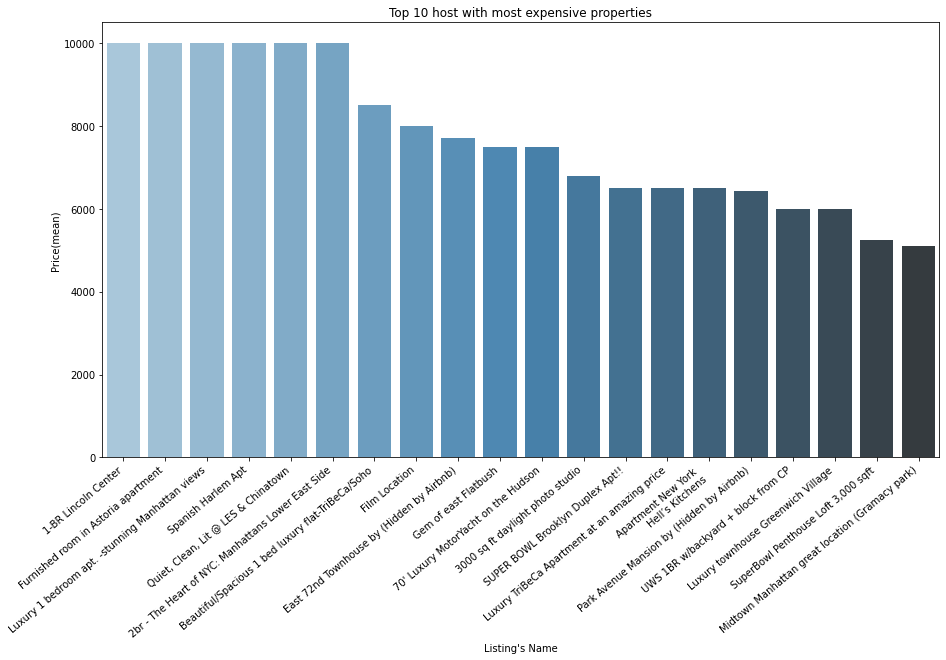

In [60]:
# Graph 3
fig, ax= plt.subplots(figsize=(15,8))

# To show the Top 10 host with most expensive listing on airbnb
d = airbnb_data.groupby('name')['price'].mean().sort_values(ascending=False)
ax=sns.barplot(d.index.tolist()[:20], d.values[:20], palette=("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel("Listing's Name")
ax.set_ylabel('Price(mean)')
ax.set_title('Top 10 host with most expensive properties')
plt.show()

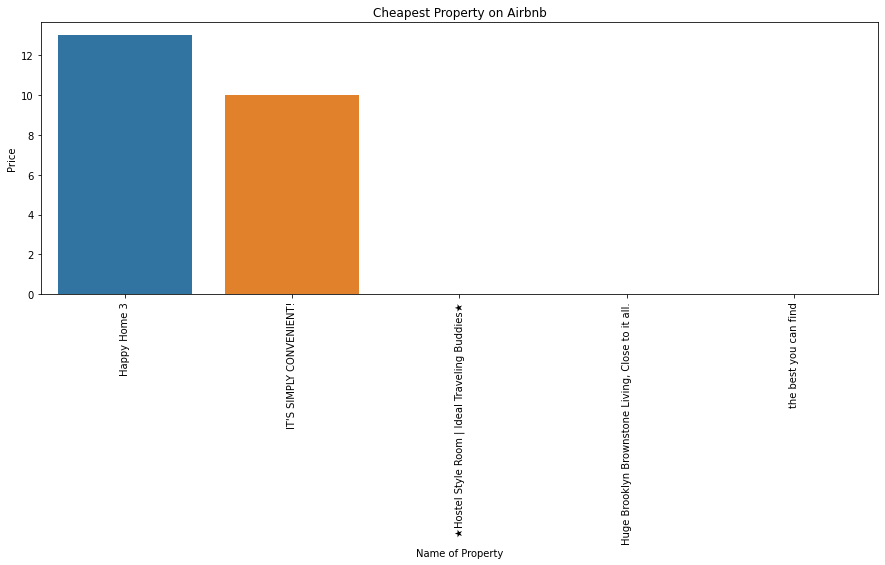

In [61]:
# Graph 4
# Cheapest listing on airbnb with room type
plt.figure(figsize=(15,5))
data_vs = sns.barplot(x="name", y="price", data=most_cheapest_neighgroup)
data_vs.set_title('Cheapest Property on Airbnb')
data_vs.set_ylabel('Price')
data_vs.set_xlabel('Name of Property')
data_vs.set_xticklabels(data_vs.get_xticklabels(), rotation=90)
plt.show()

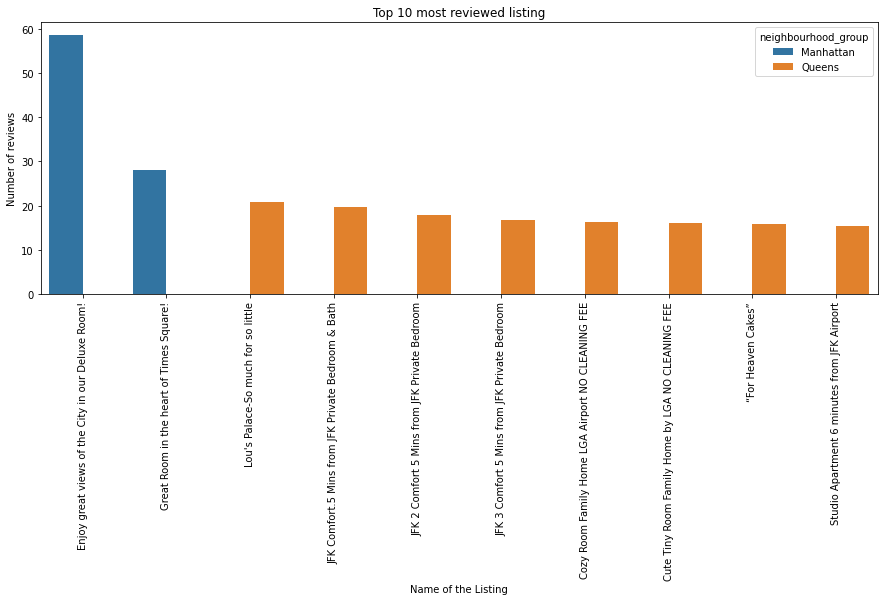

In [63]:
# Graph 5
# Top 10 most reviewed listing on airbnb
plt.figure(figsize=(15,5))
data_vs = sns.barplot(x="name", y="reviews_per_month", data=top10_reviewed_listings, hue='neighbourhood_group')
data_vs.set_title('Top 10 most reviewed listing')
data_vs.set_ylabel('Number of reviews')
data_vs.set_xlabel('Name of the Listing')
data_vs.set_xticklabels(data_vs.get_xticklabels(), rotation=90)
plt.show()

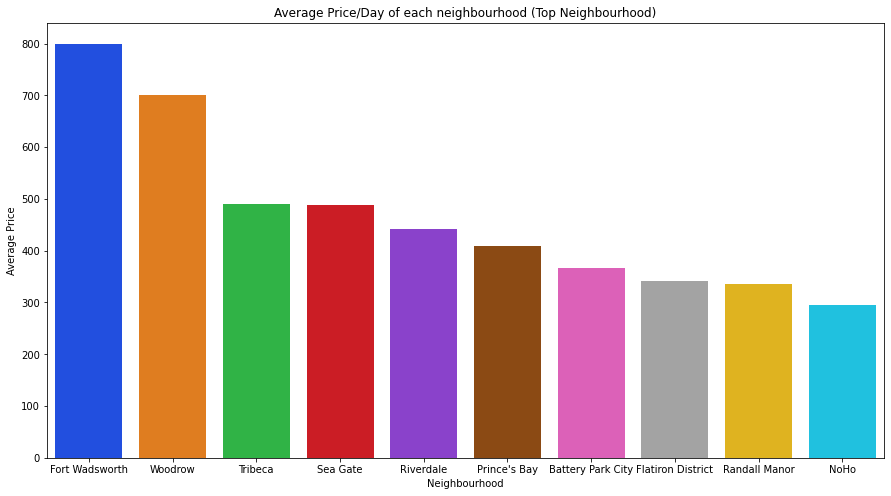

In [64]:
# Graph 6
# Average cost of top 10 neighbour 
fig = plt.subplots(figsize=(15,8))
ax=sns.barplot(data=df_ngroup_sorted[:10], x='neighbourhood', y='price', palette="bright")
plt.title("Average Price/Day of each neighbourhood (Top Neighbourhood)")
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts indicates the frequency counts of values for the different levels of a categorical variable. Sometimes, bar charts exhibit different statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

**Graph - 1:** As we can see in the graph 1, Most Favourable Rooms by Customers is either Entire Home /Apartment or Private Room which is high in price also(more than 200$). While Shared room is least favourite. Also Average Room Price of Entire Home/Apartment is highest followed by Private room then Shared Room.

**Graph - 2:** From the graph 2, we can examine the Top Most Expensive Neighbourhood is Fort Wadsworth followed by Woodrow and Tribeca with the mean price of 800$ and 700$. 
Also we can see that Manhattan has the highest(the costliest) average of price ranging to 150dollars/day followed by Brooklyn. And Queens and Staten Island have same average price/day.

**Graph - 3:** This graph tells us the Most costly listing from Luxury 1 bedroom apt. -stunning Manhattan views, 1-BR Lincoln Centre and Furnished room in Astoria apartment which is from Manhattan, Brooklyn and Queens hosted by Erin, Jelena and Kathrine respectively with the highest average price of 10k dollar.

**Graph - 4:** So from graph 4, it is clear that the Most cheapest listing is from IT'S SIMPLY CONVENIENT! and Happy Home 3 which is from Queens and Staten Island hosted by Maria and Raquel respectively. As it is cheap property so it will be more available for the customers.
Also some listings has the price of zero which is quite strange, it is either a free stay for specific time or the willingness of not to share the price with the Airbnb.

**Graph - 5:** Property with highest number of reviews is Enjoy great views of the City in our Deluxe Room! with 58 reviews/month that is from Manhattan. Top 2 are from Manhattan so we can decide the best suited place for a comfortable stay but the prices are high to afford.
There were less reviews received from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

**Graph - 6:** As we can see in graph 2, graph 6 is also showing the same. Top Most Expensive Neighbourhood is Fort Wadsworth followed by Woodrow and Tribeca with the mean price of 800$ and 700$.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights is helping us in creating a positive business impact. As we have found the most demanded location, room types, most and less reviewed properties etc, it will be easy for the anyone to analyze the information from this graphs by just looking at it.

#### Chart - 5 - Correlation Heatmap and Histogram (Bivariate)

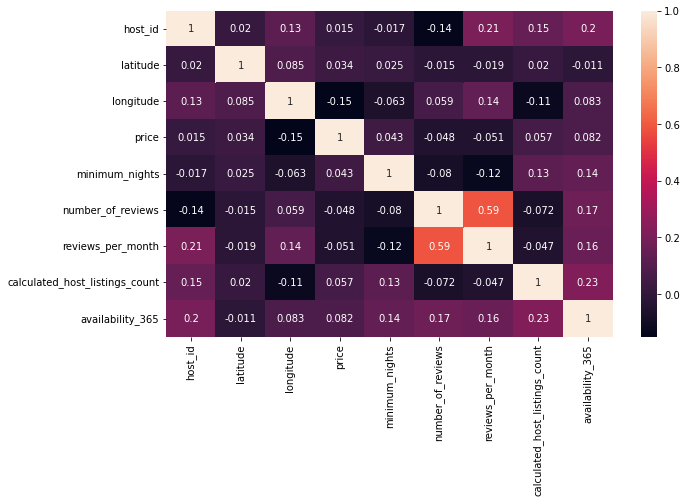

In [65]:
# Chart - 5 visualization code
# Graph 1

# Correlation Heatmap visualization code
corr = airbnb_data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True)
plt.show()

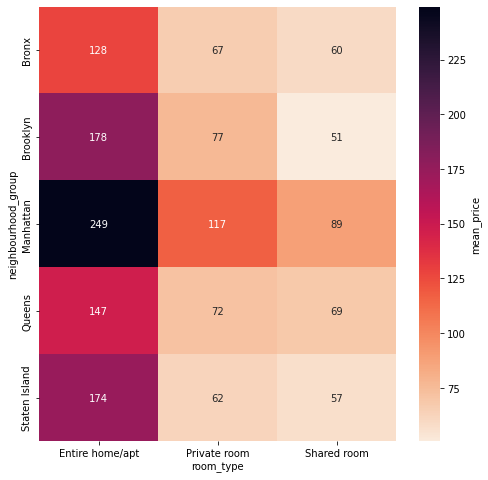

In [68]:
# Graph 2

# Plotting a heatmap of the mean price for room type and a property type
plt.figure(figsize = (8,8))
sns.heatmap(airbnb_data.groupby(['neighbourhood_group', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", 
            cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})
plt.show()

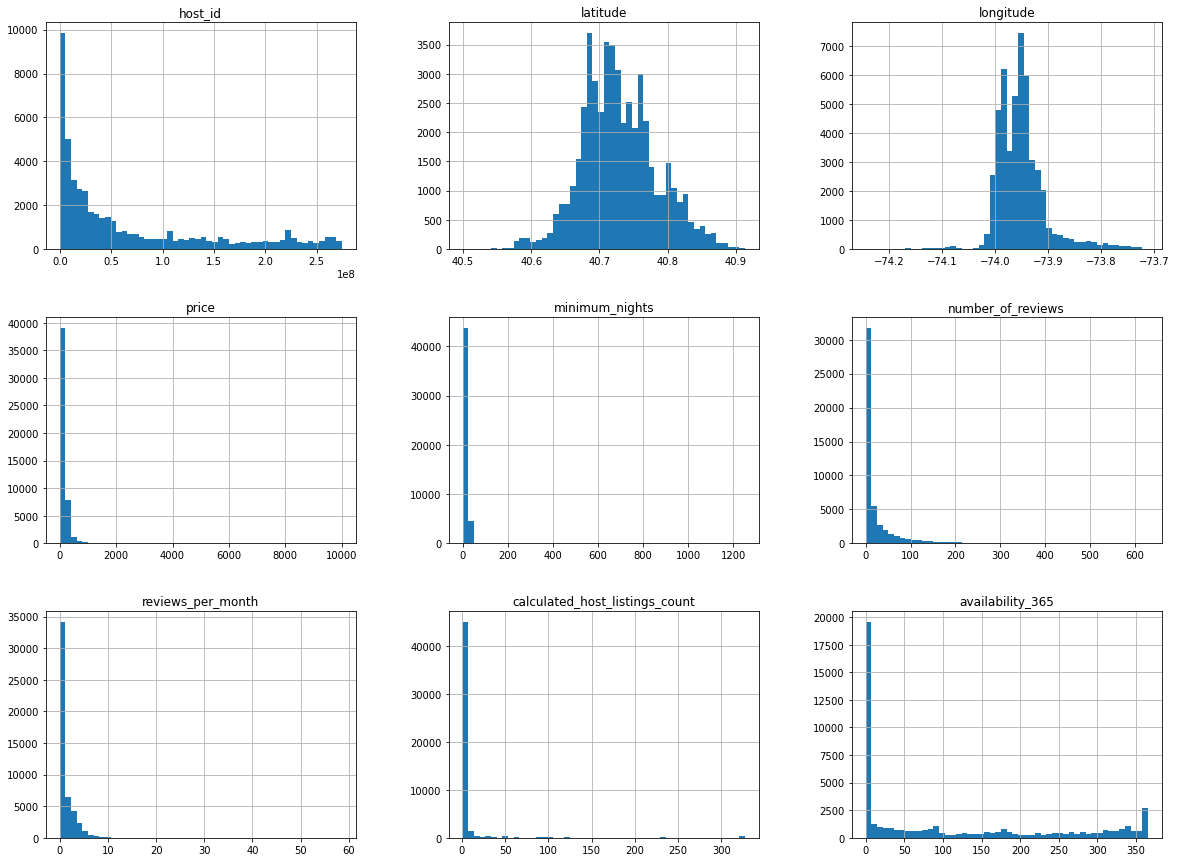

In [66]:
# Graph 3

# Histogram visualization graph of numeric data
airbnb_data.hist(bins=50, figsize=(20,15))
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap - A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

Histogram - The histogram is used to summarize the continuous data that are measured on an interval scale. It is often used to illustrate the most important features of the distribution of the data in a convenient form. It is moreover beneficial when dealing with large amount of data sets. It can be helpful in detecting outliers or any gaps in the data.

So that we have used the correlation heatmap to see correlation between all the variables along with the correlation coeficients and histogram plot to evaluate the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

**Graph - 1:** By Using Heatmap in graph 1, We can see that apart from number of Reviews & Reviews per Month, there is no significant Correlation between any of the Variables

**Graph - 2:** In the graph 2, heatmap shows the relationship between neighbourhood_group and room_type value by showing the Average Price of Room type in different Neighbourhood Group

**Graph - 3:** By Using Histogram (Bivariate Variables) in graph 3, We are checking the relationship between all the Numerical Variable


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. From this we got to know about the mean prices and its positive impact on the airbnb. 

#### Chart - 6 - Violin plot (Bivariate)

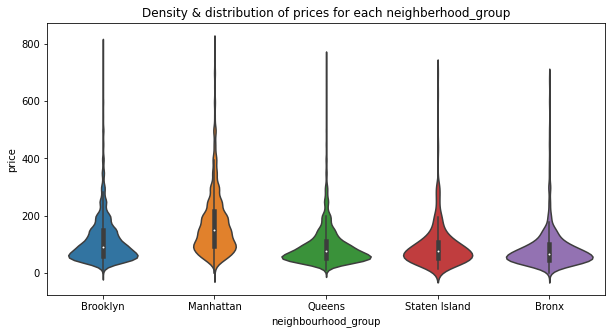

In [69]:
# Chart - 6 visualization code
# Checking Relationship of neighbourhood group and price of listings
plt.figure(figsize = (10,5))
fig = sns.violinplot(data = airbnb_data, x = 'neighbourhood_group', y = airbnb_data[airbnb_data['price'] < 800]['price'])
fig.set_title('Density & distribution of prices for each neighberhood_group')
plt.show()

##### 1. Why did you pick the specific chart?

Violin Plot is a mixture of box plot and rotated kernel density plot on each side. It helps in the visualization of the distribution of the numeric data. The width of the PDF describes how frequently that value occurs in the data set. The wider regions of the density plot indicate values that occur more frequently. So from this we can easily depict our data.

##### 2. What is/are the insight(s) found from the chart?

As usual Manhattan being the most costliest place to live in followed by Brooklyn. We can also show the average price of most costliest place by using the Y-axis of the violin plot. Also Queens, Staten Island are on the same page with price on listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. It cleared about the costliest place of the NYC so that customer or one can easily identified the location before the bookings.

#### Chart - 7

In [49]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [50]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [51]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [52]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [53]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [54]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [55]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [56]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [57]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***